# plt_colors


## NUEVO
- style sheets https://matplotlib.org/stable/gallery/style_sheets/index.html, puedo poner style sheet como parámetro de mis gráficos (print(plt.style.available))
- Dibujar las paletas en redondelitos 
- Antes tengo que terminar con el show_colors y ....
    Puedo separar el plt_functions en plt_colors, plt_charts (tengo mucho sobre colors y voy a tener mucho más sobre charts)

## TO-DO 
1. en show_plt_palettes que me permita ingresar la/las paleta como argumento
- por qué quiero hacer esto?:
    1. Para ver si ciertas paletas existen de modo de:
    2. Determinar todas las paletas secuenciales para:
    3. Que en el pie chart las NO secuenciales NO eliminen los extremos
- igual, YA VEREMOS, porque por ahí lo que conviene es UNICAMENTE eliminar los extremos si la palette NO ES Qualitative
1. También el show palettes que me muestre las listas escritas listas COMPLETAS (no solo las que se muestran) -DONE
    - Y ya hice que las que se muestran sean igual a las listadas (veremos luego como se complica el show palettes ejecutado fuera de .ipynb)

## OJO !, 
- en todo lo que graique fig!1, debo evaluar hacer el ax_plt_xxx independiente por si quiero pedar todos mis 
- distinto ax en una misma fig de varios subplots (igual debería investigar más el subfigures!!!)

In [2]:
# Standard Libs
from typing import Optional, Union
import random
import textwrap
import sys
import re
from tabulate import tabulate

# Third-Party Libs
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import colormaps
from matplotlib.patches import Rectangle
# # from colorspacious import cspace_converter
import matplotlib as mpl

# Local Libs
from jm_utils.data import plt_functions as plt_func
from jm_utils.data.pd_functions import to_series
import jm_utils.data.mpl_colors as mpl_colors

plt_func.__version__
# print(f"{mpl.__version__ = }")  # 3.10.13
sys.version
print(sys.version_info)
mpl_colors.__version__

sys.version_info(major=3, minor=13, micro=5, releaselevel='final', serial=0)


'0.1.0'

In [ ]:
mpl_colors.MPL_CMAP_NAMES
# BIEN eso del dic-- ALORA ver el dic de colors_names!!!

{'Cyclic': (['hsv',
   'hsv_r',
   'twilight',
   'twilight_r',
   'twilight_shifted',
   'twilight_shifted_r'],
  'For values that wrap around at the endpoints, such as phase angle, wind direction, or time of day'),
 'Diverging': (['BrBG',
   'BrBG_r',
   'bwr',
   'bwr_r',
   'coolwarm',
   'coolwarm_r',
   'PiYG',
   'PiYG_r',
   'PRGn',
   'PRGn_r',
   'PuOr',
   'PuOr_r',
   'RdBu',
   'RdBu_r',
   'RdGy',
   'RdGy_r',
   'RdYlBu',
   'RdYlBu_r',
   'RdYlGn',
   'RdYlGn_r',
   'seismic',
   'seismic_r',
   'Spectral',
   'Spectral_r'],
  'When the information being plotted has a critical middle value, such as topography or when the data deviates around zero'),
 'Miscellaneous': (['brg',
   'brg_r',
   'CMRmap',
   'CMRmap_r',
   'cubehelix',
   'cubehelix_r',
   'flag',
   'flag_r',
   'gist_earth',
   'gist_earth_r',
   'gist_ncar',
   'gist_ncar_r',
   'gist_rainbow',
   'gist_rainbow_r',
   'gist_stern',
   'gist_stern_r',
   'gnuplot',
   'gnuplot_r',
   'gnuplot2',
   'gnuplo

In [2]:
# dir(plt_func)
# fig = plt_func.show_plt_palettes('Cyclic')

## Matplotlib Color names
- Qwen3-Coder

In [3]:
mcolors_lst = (dir(mcolors))
# print(textwrap.fill(", ".join(dir(mcolors)), width=140))
mcolors.BASE_COLORS

def is_uppercase(s):
    return bool(re.fullmatch(r'[A-Z][A-Z_4]*', s))   # Verifica que empiece con mayúscula y el resto sean mayúsculas o '_'

for item in dir(mcolors):
    if is_uppercase(item):
        print(item)

BASE_COLORS
CSS4_COLORS
TABLEAU_COLORS
XKCD_COLORS


In [4]:
print(list(mcolors.BASE_COLORS))
# mcolors.CSS4_COLORS

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']


In [5]:
# # The petroff10 style in Matplotlib is a predefined style sheet introduced to enhance data visualization accessibility. It features a 10-color sequence designed by Matthew A. Petroff, balancing aesthetics and accessibility. This makes it particularly useful for creating plots where clear distinction between data series is essential, even for viewers with visual impairments.
# # How to Use petroff10 in Matplotlib
# # You can apply the petroff10 style to your plots as follows:
# # import matplotlib.pyplot as plt

# # Use the petroff10 style
# plt.style.use('petroff10')

# # Example plot
# x = range(10)
# for i in range(10):
#     plt.plot(x, [xi * (i + 1) for xi in x], label=f'Series {i+1}')

# plt.legend()
# plt.title('Petroff10 Style Example')
# plt.show()

# # Key Features

# # 10-color palette: Ensures clear differentiation between data series.
# # Accessibility: Designed with colorblind-friendly considerations.
# # Versatility: Suitable for a variety of plot types.

# # This style is ideal for creating visually appealing and inclusive visualizations.


In [6]:
# colors = mpl.color_sequences['tab10'] # con lo sequential (y otros) da error
# colors

In [7]:
def get_matplotlib_colors_dict():
    """ matplotlib v. 3.10.3 """
    matplotlib_colors = {
        "BASE_COLORS": (list(mcolors.BASE_COLORS),
                        """One letter color names: 'b'lue, 'g'reen, 'r'ed, 'c'yan, 'm'agenta, 'y'ellow, blac'k', 'w'hite
                        The colors g, c, m, and y do not coincide with X11/CSS4 colors. Their particular shades were chosen for better visibility of 
                        colored lines against typical backgrounds"""),
        'CSS4_COLORS': (list(mcolors.CSS4_COLORS),
                        "Case-insensitive X11/CSS4 color name with no spaces"),
        'TABLEAU_COLORS': (list(mcolors.TABLEAU_COLORS),
                        "Tableau Palette"),
        'XKCD_COLORS': (list(mcolors.XKCD_COLORS),
                        "The 954 most common RGB monitor colors, as defined by several hundred thousand participants in the xkcd color name survey")                  
    }
    
    return matplotlib_colors

In [8]:
# Vamos a formatear ls lista ... con f-string pero también con tabiulate o ljust (reconfigurando una lista de listas)
dic = get_matplotlib_colors_dict()
# lst = dic['XKCD_COLORS'][0]
lst = dic['CSS4_COLORS'][0]
# print(len(lst))

k = 'XKCD_COLORS'
k = 'XKCD_COLORS'
sp = 1

for k in dic.keys():
    sp, cols = 21, 10
    if k == 'XKCD_COLORS':
        sp, cols = 27, 8

    fmt_values = ''
    for i, color in enumerate(dic[k][0]):
        fmt_values += f"{color:<{sp}}"
        if (i + 1) % cols == 0:
            fmt_values += '\n'

    print()
    print(k)
    print(fmt_values)




BASE_COLORS
b                    g                    r                    c                    m                    y                    k                    w                    

CSS4_COLORS
aliceblue            antiquewhite         aqua                 aquamarine           azure                beige                bisque               black                blanchedalmond       blue                 
blueviolet           brown                burlywood            cadetblue            chartreuse           chocolate            coral                cornflowerblue       cornsilk             crimson              
cyan                 darkblue             darkcyan             darkgoldenrod        darkgray             darkgreen            darkgrey             darkkhaki            darkmagenta          darkolivegreen       
darkorange           darkorchid           darkred              darksalmon           darkseagreen         darkslateblue        darkslategray        darkslategrey        dark

#### También vamos a probar tabulte y ljust...
- Sacamos en limpio que puedos usar el cols_width para hacerlo más dinámico? veremos en la func principal 
    - col_widths = [max(len(str(item)) for item in col) for col in zip(*wrlst_1)]
    - SOLO sirve si yo separase la lst en lst de lsts.. porque sino me queda un UNICO valor y no es variable por cols (por ahora NO! -13/8/25)
- NO de forma simple, tabulate serviría para lista de listas por ej..  
    - Los vamos a hacer con wrlst_1 = [lst[i:i + ncols] for i in range(0, len(lst), ncols)]
- en Qwen algo variable se puede ver.. pero dejamos lo que tengo..

In [9]:
### TENGO que seguir ESTUDIANDO este tema porque para TODOS los elementos de CSS4.. list NO Funciona para pocos SI????
# Sacamos en limpio que puedos usar el cols_width para hacerlo más dinámico? veremos en la func principal
# Vamos a probar tabulate con lista de listas
from tabulate import tabulate
dic = get_matplotlib_colors_dict()
lst = dic['CSS4_COLORS'][0]

# Ahora a es lista plana la tengo que dividir en sublistas de n_columnas
ncols = 7

wrapper_lst = []
internal_lst = []
for i, el in enumerate(lst):
    internal_lst.append(el)
    if (i + 1) % ncols == 0:
        wrapper_lst.append(internal_lst.copy())
        internal_lst.clear()

wrlst_1 = [lst[i:i + ncols] for i in range(0, len(lst), ncols)]
# wrlst_1

# # print(wrapper_lst)
# wrapper_lst
# # internal_lst == lst
# # internal_lst

# print(tabulate(wrapper_lst, tablefmt="grid"))
a = tabulate(wrlst_1)
# print(a)
# print()

# Ancho de cada columna
col_widths = [max(len(str(item)) for item in col) for col in zip(*wrlst_1)]
# print(col_widths)

# Imprimir cada fila con formato
# for row in wrlst_1:
    # print("  ".join(str(item).ljust(width) for item, width in zip(row, col_widths)))


max(len(el) for el in lst)

20

In [10]:
### TENGO que seguir ESTUDIANDO este tema porque para TODOS los elementos de CSS4.. list NO Funciona para pocos SI????
d = get_matplotlib_colors_dict()
l = d['CSS4_COLORS'][0][:27]
# display(l)

ncols = 3
wl = [l[i: i + ncols] for i in range(0, len(l), ncols)]
# display(wl)
# display(list(zip(*wl)))

col_widths = [max(len(el) for el in col) for col in zip(*wl)]
display(col_widths)

all_text = ''
for row in wl:
    # all_text += " ".join(str(el).ljust(width) for item, width in zip(row, col_widths))
    print("  ".join(str(item).ljust(width) for item, width in zip(row, col_widths)))

# print(all_text)

[10, 12, 14]

aliceblue   antiquewhite  aqua          
aquamarine  azure         beige         
bisque      black         blanchedalmond
blue        blueviolet    brown         
burlywood   cadetblue     chartreuse    
chocolate   coral         cornflowerblue
cornsilk    crimson       cyan          
darkblue    darkcyan      darkgoldenrod 
darkgray    darkgreen     darkgrey      


In [11]:
ncols = 5
lst = [chr(i) + chr(int(i + (i/7))) for i in range(60, 90)]
wlst = [lst[i: i + ncols] for i in range(0, len(lst), ncols)]

# col_widths = [max(len(str(item)) for item in col) for col in zip(*wlst)]
col_widths = [max(len(str(item)) for item in col) for col in zip(*wlst)]
print(col_widths)
# for row in wlst:
#     print("  ".join(str(item).ljust(width) for item, width in zip(row, col_widths)))


[2, 2, 2, 2, 2]


In [12]:
l2 = [['1', '22'], ['55555', '333']]
l3 = ['1', '22', '55555', '333']
# max([len(el) for el in l2])
max(len(el) for el in l3)


5

In [13]:
# data = [
#     ["Nombre", "Edad", "Ciudad"],
#     ["Ana", "23", "Madrid"],
#     ["Luis", "30", "Barcelona"],
#     ["Marta", "25", "Valencia"]
# ]

# # Ancho de cada columna
# col_widths = [max(len(str(item)) for item in col) for col in zip(*data)]

# # Imprimir cada fila con formato
# for row in data:
#     print("  ".join(str(item).ljust(width) for item, width in zip(row, col_widths)))

In [14]:
# if len(lst) > 12:
#     fmt_values = f"{lst[0]:{sp}}{lst[1]:{sp}}{lst[2]:{sp}}{lst[3]:{sp}}{lst[4]:{sp}}{lst[5]:{sp}}{lst[6]:{sp}}{lst[7]:{sp}}{lst[8]:{sp}}{lst[9]:{sp}}\n"
#     fmt_values += f"{lst[10]:{sp}}{lst[11]:{sp}}{lst[12]:{sp}}{lst[13]:{sp}}{lst[14]:{sp}}{lst[15]:{sp}}{lst[16]:{sp}}{lst[17]:{sp}}{lst[18]:{sp}}{lst[19]:{sp}}\n"
#     fmt_values += f"{lst[20]:{sp}}{lst[21]:{sp}}{lst[22]:{sp}}{lst[23]:{sp}}{lst[24]:{sp}}{lst[25]:{sp}}{lst[26]:{sp}}{lst[27]:{sp}}{lst[28]:{sp}}{lst[29]:{sp}}\n"

# print(fmt_values)

## A mostrar TODOS los RED
    - vamos a buscar en todas las categorías los que tengan algo del find
    - ej 'FIND BLUE, or FIND RED PINK ORANGE.

In [15]:
dic = get_matplotlib_colors_dict()
l0 = dic['BASE_COLORS'][0]
l1 = dic['CSS4_COLORS'][0]
l2 = dic['TABLEAU_COLORS'][0]
l3 = dic['XKCD_COLORS'][0]

print(l0)
base_full_lst = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
base_colors_dic = dict(zip(base_full_lst, l0))
print(base_colors_dic)
new_lst = []



all_colors = l1 + l2 + l3


# input = '  find cyan  GReen BLUE  '.strip().upper()
# input = '  find   red '.strip().upper()
input = '  find   pink BLack  oranGE '.strip().upper()

if input.startswith('FIND '):
    input_lst = input.split()[1:]
    print(input_lst)

target = 'BLue'

colors_lst_tmp = []
# for target in ['red', 'GReen', 'BLUE']:
for target in input_lst:
# fl1 = [res for res in l1 if l1.lower() == color]
    try:
        colors_lst_tmp.append(base_colors_dic[target.lower()])
    except KeyError:
        pass
    flst = list(filter(lambda color: target.lower() in color.lower(), all_colors))
    colors_lst_tmp.append(flst.copy())

# list(zip(*colors_lst_tmp))
# n1 = [string for sublista in listas_de_strings for string in sublista]
# colors_lst = sorted([color for sublist in colors_lst_tmp for color in sublist])
colors_lst = [color for sublist in colors_lst_tmp for color in sublist]
colors_lst

['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
{'blue': 'b', 'green': 'g', 'red': 'r', 'cyan': 'c', 'magenta': 'm', 'yellow': 'y', 'black': 'k', 'white': 'w'}
['PINK', 'BLACK', 'ORANGE']


['deeppink',
 'hotpink',
 'lightpink',
 'pink',
 'tab:pink',
 'xkcd:pinkish tan',
 'xkcd:strong pink',
 'xkcd:lavender pink',
 'xkcd:pig pink',
 'xkcd:candy pink',
 'xkcd:orange pink',
 'xkcd:powder pink',
 'xkcd:darkish pink',
 'xkcd:peachy pink',
 'xkcd:rosy pink',
 'xkcd:violet pink',
 'xkcd:muted pink',
 'xkcd:coral pink',
 'xkcd:dark hot pink',
 'xkcd:old pink',
 'xkcd:warm pink',
 'xkcd:pinky',
 'xkcd:blush pink',
 'xkcd:bubble gum pink',
 'xkcd:purple/pink',
 'xkcd:brownish pink',
 'xkcd:medium pink',
 'xkcd:very light pink',
 'xkcd:purpleish pink',
 'xkcd:pinkish orange',
 'xkcd:ugly pink',
 'xkcd:electric pink',
 'xkcd:carnation pink',
 'xkcd:purply pink',
 'xkcd:grey pink',
 'xkcd:purpley pink',
 'xkcd:pink/purple',
 'xkcd:pinkish grey',
 'xkcd:shocking pink',
 'xkcd:pinkish brown',
 'xkcd:pink red',
 'xkcd:faded pink',
 'xkcd:soft pink',
 'xkcd:greyish pink',
 'xkcd:red pink',
 'xkcd:dirty pink',
 'xkcd:pinky red',
 'xkcd:barbie pink',
 'xkcd:bubblegum pink',
 'xkcd:dusky pi

In [25]:
def plot_matplolib_colors(
        color_group: Optional[str | list[str]] = 'SAMPLE',
        n_cols=6,
        sort_colors=True
) -> tuple[plt.Figure, plt.Axes]:
    
    # Build the dictionary containing the color names sorted by category (dict key)
    colors_by_category_dic = get_matplotlib_colors_dict()

    # Add 'SAMPLE' key entry to colors_by_category_dic, value: (Sample of 8 colors of e/category, and a Description)
    list_of_pltt_lists = [value[0] for value in colors_by_category_dic.values()]              # Needed as source of data to get a random sample of 4 palettes of e/category
    colors_by_category_dic['SAMPLE'] = (                                                      # Added 'Sample' dict_key
        [color for c_g in list_of_pltt_lists for color in random.sample(c_g, k=8)],           # A random sample of 8 of e/category
        "8 colors of e/category: 8 BASE_COLORS, 8 CSS4_COLORS, 8 TABLEAU_COLORS, 8 XKCD_COLORS")

    # First internal aux. funct. _plot_dic(): generates a figure containing the names of the palettes according to their category
    def _show_dic(dic):
        all_text =""
        for group_name, (color_list, description) in dic.items():
            if group_name == 'SAMPLE':          # Sample list is not showed
                continue
            sp, ncols = 21, 10                  # sp: space between color names, n_cols: number of columns
            if group_name == 'XKCD_COLORS':
                sp, ncols = 27, 8               # Grater space between color names and less columns
                
            all_text += f"* {group_name} ({len(color_list)}).- {description}:\n"    # Category label and description

            # Dashed subline construction
            leng_ln = len(group_name) + len(description) + 12
            n_dashes = leng_ln if leng_ln < 151 else 150
            all_text += '-' * n_dashes + "\n"

            # Formeatado con f-strings
            for i, color in enumerate(color_list):
                all_text += f"{color:<{sp}}"
                if (i + 1) % ncols == 0:
                    all_text += '\n' if color != color_list[-1] else ''
            all_text += '\n\n\n'

        # Build de Figure showing all text
        fig, ax = plt.subplots(figsize=(20, len(all_text.splitlines()) * 0.2))
        ax.set_axis_off()                          # Hide x and y axis
        ax.set_title('Matplotlib colors names by category (color_group)', fontsize=12, fontweight='medium', family="monospace")
        ax.text(0.025, 0.46, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig

    # 2nd internal aux. funct. _search_request(): build a color_grp_names_lst based on colors requested to find
    def _get_the_required_search(search):

        # Build a big list (most_colors) w/all colors, where we we'll search (except BASE_COLORS, those will be allocated en a dict)
        base_colors_lst = dic['BASE_COLORS'][0]
        css4_colors_lst = dic['CSS4_COLORS'][0]
        tableau_colors_lst = dic['TABLEAU_COLORS'][0]
        xkcd_colors_lst = dic['XKCD_COLORS'][0]

        most_colors_lst = css4_colors_lst + tableau_colors_lst + xkcd_colors_lst
        
        base_colors_fullname_lst = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'white']
        base_colors_dic = dict(zip(base_colors_fullname_lst, base_colors_lst))         # dict(zip(keys, values))

        # Beging the search in the most_color_lst and the base_colors_dic
        searched_colors_lst = search.split()[1:]
        colors_lst_tmp = []
        for target in searched_colors_lst:
            try:                                # Cause key could not exist in base_colors_dic                                
                colors_lst_tmp.append(base_colors_dic[target.lower()])
            except KeyError:
                pass
            filtered_colors = list(filter(lambda color: target.lower() in color.lower(), most_colors_lst))
            colors_lst_tmp.append(filtered_colors.copy())

        return [color for sublist in colors_lst_tmp for color in sublist]              # color_grp_names_lst to plot

    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(color_group, str):          
        color_group_key = color_group.strip().upper()
        if color_group_key == 'NAMES':
            fig = _show_dic(colors_by_category_dic)
            return fig
        elif color_group_key.startswith('FIND '):                    # Acá vamos a hacer un jorgitomonteada
            color_grp_names_lst = _get_the_required_search(color_group_key)   
            color_group_desc = color_group_key
            color_group_key = 'Search request'
        elif color_group_key not in colors_by_category_dic.keys():
            raise ValueError(f"Invalid value for 'palette_group': {repr(color_group)}. Expected one of: {colors_by_category_dic.keys()}, NAMES")
        else:
            # Get the color_grp_names_lst and color_group_desc of the selected color category (group) - color_group_key
            color_grp_names_lst, color_group_desc = colors_by_category_dic[color_group_key]
            # Sort colors by hue (tono), saturation, value and name if sort_colors = True and not 'SAMPLE' selected group
            if sort_colors is True and color_group_key != 'SAMPLE':
                colors = eval(f"mcolors.{color_group_key}")             # Native (real) mcolors.XXXX_COLORS in colors variable
                if sort_colors is True:                         
                    color_grp_names_lst = sorted(colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
                
    elif isinstance(color_group, list):   
        color_group_key = 'Custom'              # Only for title, no a new entry to de dictionary
        color_grp_names_lst = color_group      # The list of entered palettes to be shown
        color_group_desc = 'User selected colors'
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(color_group)}. Expected one of: 'str' or 'list'.")

    # Buil the fig. with colors and colors names of the selected group: color_group_key: (color_grp_names_lst, color_group_desc)
    cell_width, cell_height, swatch_width, margin = 212, 22, 48, 12

    nrows = np.ceil(len(color_grp_names_lst) / n_cols)

    width = cell_width * n_cols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * n_cols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(f"* {color_group_key} ({len(color_grp_names_lst)}).- {color_group_desc}:\n",
                 fontsize=14, fontweight='bold')

    for i, color_name in enumerate(color_grp_names_lst):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, color_name, fontsize=14, ha='left', va='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=color_name, edgecolor='0.7')
        )

    return fig, ax      ## UHHH.. voy a tener que hacer esto IGUAL que que plt_pie con ax_func  y plt_func LATER 
                        # Porque todo esto empezó para que el ax_pie solo desplace los colores para los sequential

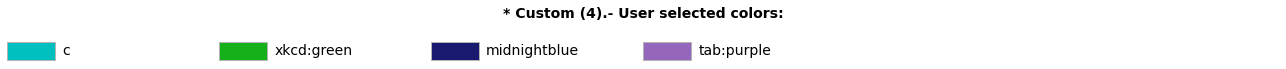

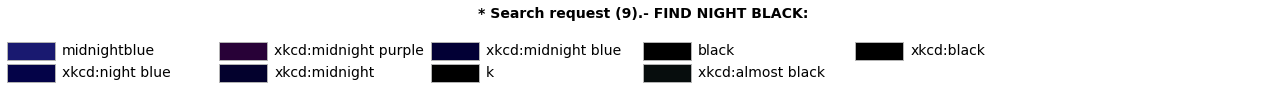

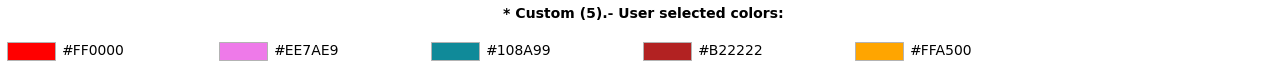

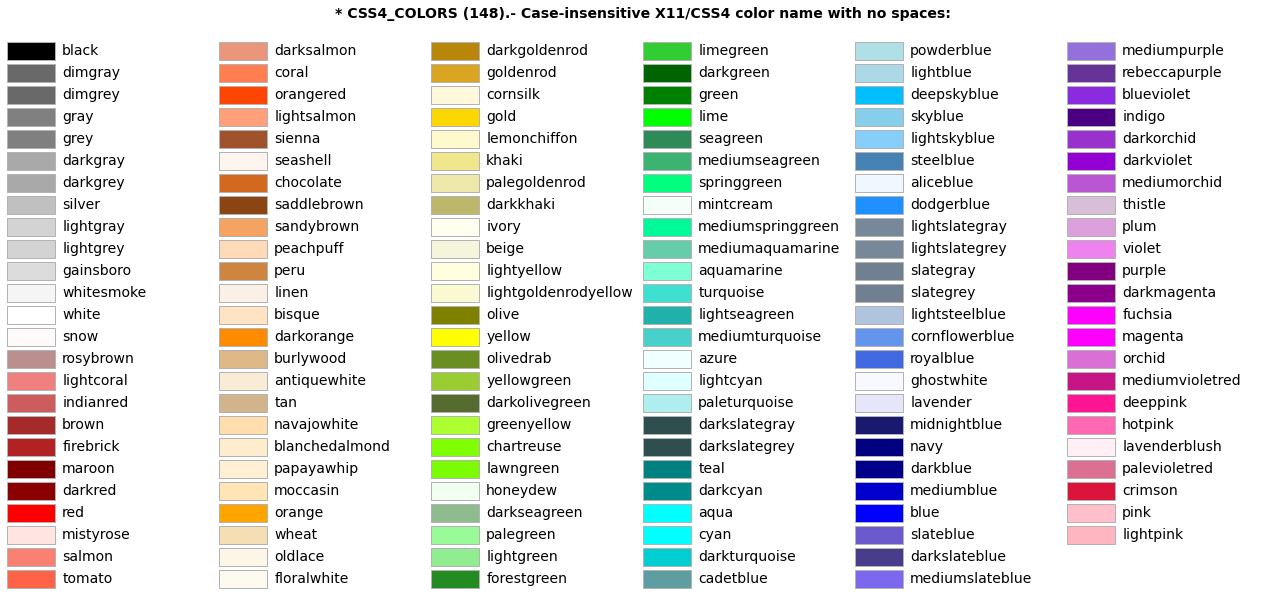

In [26]:
# fig, ax = plot_matplolib_colors('tableau_colors')
fig, ax = plot_matplolib_colors(['c', 'xkcd:green', 'midnightblue', 'tab:purple'])
fig, ax = plot_matplolib_colors('find night black')
# fig, ax = plot_matplolib_colors('find blue')
fig, ax = plot_matplolib_colors(['#FF0000', '#EE7AE9', '#108A99', '#B22222', '#FFA500'])
fig, ax = plot_matplolib_colors('css4_colors')


In [ ]:
def show_matplolib_colors(color_group, n_cols=6, sort_colors=True):
    
    colors_by_category_dic = get_matplotlib_colors_dict()

    # Add 'SAMPLE' key entry to colors_by_category_dic, value: (Sample of 8 colors of e/category, and a Description)
    list_of_pltt_lists = [value[0] for value in colors_by_category_dic.values()]              # Nedeed as source of data to get a random sample of 4 palettes of e/category
    colors_by_category_dic['SAMPLE'] = (                                                      # Added 'Sample' dict_key
        [color for c_g in list_of_pltt_lists for color in random.sample(c_g, k=8)],           # A random sample of 8 of e/category
        "8 colors of e/category: 8 BASE_COLORS, 8 CSS4_COLORS, 8 TABLEAU_COLORS, 8 XKCD_COLORS")

    # _plot_dic: Internal auxiliary function that generates a figure containing the names of the palettes according to their category
    def _show_dic(dic):
        all_text =""
        for group_name, (color_list, description) in dic.items():
            if group_name == 'SAMPLE':          # Sample list is not showed
                continue
            sp, ncols = 21, 10                  # sp: space between color names, n_cols: number of columns
            if group_name == 'XKCD_COLORS':
                sp, ncols = 27, 8               # Grater space between color names and less columns
                
            all_text += f"* {group_name} ({len(color_list)}).- {description}:\n"    # Category label and description

            # Dashed subline construction
            leng_ln = len(group_name) + len(description) + 12
            n_dashes = leng_ln if leng_ln < 151 else 150
            all_text += '-' * n_dashes + "\n"

            # Formeatado con f-strings
            for i, color in enumerate(color_list):
                all_text += f"{color:<{sp}}"
                if (i + 1) % ncols == 0:
                    all_text += '\n' if color != color_list[-1] else ''
            # # Formateado con tabulate, primero creo la lista de listas (all_text += wrapper_lst + '\n\n')
            # wrapper_lst = tabulate([color_list[i:i + ncols] for i in range(0, len(color_list), ncols)])
            # # Formateado con .ljust(), también primero creo la lista de listas. Bueno este hay que seguir estudiandolo
            # # Ancho de cada columna
            # col_widths = [max(len(str(item)) for item in col) for col in zip(*color_list)]
            # for row in color_list:
            #     all_text += "  ".join(str(item).ljust(width) for item, width in zip(row, col_widths))
            all_text += '\n\n\n'
        # Build de Figure showing all text
        fig, ax = plt.subplots(figsize=(20, len(all_text.splitlines()) * 0.2))
        ax.set_axis_off()                          # Hide x and y axis
        ax.set_title('Matplotlib colors names by category (color_group)', fontsize=12, fontweight='medium', family="monospace")
        ax.text(0.025, 0.46, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig            
    
    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(color_group, str):          
        color_group_key = color_group.strip().upper()
        if color_group_key == 'NAMES':
            fig = _show_dic(colors_by_category_dic)
            return fig
        elif color_group_key.startswith('FIND'):                    # Acá vamos a hacer un jorgitomonteada
            # vamos a buscar en todas las categorías los que tengan algo del find
            # ej 'FIND BLUE, or FIND RED PINK ORANGE.
            pass
        elif color_group_key not in colors_by_category_dic.keys():
            raise ValueError(f"Invalid value for 'palette_group': {repr(color_group)}. Expected one of: {colors_by_category_dic.keys()}, NAMES")
        else:
            # Get the color_grp_names_list and color_group_desc of the selected color category (group) - color_group_key
            color_grp_names_list, color_group_desc = colors_by_category_dic[color_group_key]
            # Sort colors by hue (tono), saturation, value and name if sort_colors = True and not 'SAMPLE' selected group
            if sort_colors is True and color_group_key != 'SAMPLE':
                colors = eval(f"mcolors.{color_group_key}")             # Native (real) mcolors.XXXX_COLORS in colors variable
                if sort_colors is True:                         
                    color_grp_names_list = sorted(colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
                
    elif isinstance(color_group, list):   
        color_group_key = 'Custom'              # Only for title, no a new entry to de dictionary
        color_grp_names_list = color_group      # The list of entered palettes to be shown
        color_group_desc = 'User selected palettes'
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(color_group)}. Expected one of: 'str' or 'list'.")

    # Buil the fig. with colors and colors names of the selected group: color_group_key: (color_grp_names_lst, color_group_desc)
    cell_width, cell_height, swatch_width, margin = 212, 22, 48, 12

    nrows = np.ceil(len(color_grp_names_list) / n_cols)

    width = cell_width * n_cols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * n_cols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(f"* {color_group_key} ({len(color_grp_names_list)}).- {color_group_desc}:\n",
                 fontsize=14, fontweight='bold')

    for i, color_name in enumerate(color_grp_names_list):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, color_name, fontsize=14, ha='left', va='center')

        ax.add_patch(
            # Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=colors[color_name], edgecolor='0.7')
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width, height=18, facecolor=color_name, edgecolor='0.7')
        )

    return fig
    


In [ ]:
# fig = show_matplolib_colors('css4_colors', sort_colors=False)
fig = show_matplolib_colors('sample')

fig = show_matplolib_colors('base_colors')
fig = show_matplolib_colors(['r', 'red', 'tab:red', 'xkcd:red'])
fig = show_matplolib_colors('names')
fig = show_matplolib_colors('css4_colors')
# fig = show_matplolib_colors('xkcd_colors')
# 'names'.upper()


In [ ]:
from matplotlib.patches import Rectangle

def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue (tono), saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = np.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

In [ ]:
def is_uppercase(s):
    return bool(re.fullmatch(r'[A-Z][A-Z_4]*', s))   # Verifica que empiece con mayúscula y el resto sean mayúsculas o '_'

for item in dir(mcolors):
    # if is_uppercase(item):
    if item.isupper() and not item.startswith('_'):
        print(item)
        # fig = plot_colortable(eval(f"mcolors.{item}"), ncols=6)

In [ ]:
'CASA4_CHICA!n'.isupper()

In [ ]:
stop()

## matplotlib Colormaps

In [ ]:

all_palettes = list(colormaps)
dir(colormaps)
print(textwrap.fill(", ".join(colormaps()), width=120))
print(len(colormaps()))

# print(textwrap.fill(", ".join(all_palettes), width=120))

In [ ]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

In [ ]:
plot_color_gradients('Cyclic', ['twilight', 'twilight_shifted', 'hsv'])

In [ ]:
Seq_full = ['afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'Blues', 'Blues_r', 
            'bone', 'bone_r', 'brg', 'brg_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
            'cividis', 'cividis_r', 'cool', 'cool_r', 'copper', 'copper_r', 'gist_gray', 'gist_gray_r',
            'gist_heat', 'gist_heat_r', 'gist_yarg', 'gist_yarg_r', 'GnBu', 'GnBu_r', 'gnuplot', 'gnuplot_r',
            'gray', 'gray_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'hot', 'hot_r',
            'inferno', 'inferno_r', 'magma', 'magma_r', 'ocean', 'ocean_r', 'Oranges', 'Oranges_r',
            'OrRd', 'OrRd_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'PuBu', 'PuBu_r',
            'PuBuGn', 'PuBuGn_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdPu', 'RdPu_r',
            'Reds', 'Reds_r', 'spring', 'spring_r', 'summer', 'summer_r', 'terrain', 'terrain_r',
            'viridis', 'viridis_r', 'winter', 'winter_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGn_r',
            'YlGnBu', 'YlGnBu_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r']

perceptually_uniform = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
single_hue = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
              'binary', 'gray', 'gist_gray', 'gist_yarg', 'bone', 'pink']
multi_hue = ['YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu',
             'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
miscellaneous = ['autumn', 'spring', 'summer', 'winter', 'cool', 'hot', 'afmhot', 'copper',
                 'gist_heat', 'Wistia', 'terrain', 'ocean', 'brg', 'gnuplot']
mis = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
       'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral', 'gist_ncar']

def add_reversed(names):
    return [name for n in names for name in (n, n + '_r')]

Seq_groups = {
    "Perceptually Uniform": [c for c in Seq_full if c in add_reversed(perceptually_uniform)],
    "Single-Hue": [c for c in Seq_full if c in add_reversed(single_hue)],
    "Multi-Hue": [c for c in Seq_full if c in add_reversed(multi_hue)],
    "Miscellaneous": [c for c in Seq_full if c in add_reversed(miscellaneous)],
}

# for group, items in Seq_groups.items():
#     print(f"\n# {group} ({len(items)}):")
#     print("   " + ", ".join(items))

Seq_uniform = ['flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern', 'gnuplot', 'gnuplot2', 'CMRmap',
       'cubehelix', 'brg', 'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral', 'gist_ncar']
Seq_uniform = sorted(Seq_uniform, key=lambda s: s.lower())
su_with_r = [pltt + '_r' for pltt in Seq_uniform]
Seq_uniform = sorted(Seq_uniform + su_with_r, key=lambda s: s.lower())

for i, pltt in enumerate(Seq_uniform):
    print(f"'{pltt}',", end=" ")
    if (i + 1) % 8 == 0:
        print()

Seq_uniform = ['cividis', 'cividis_r', 'inferno', 'inferno_r', 'magma', 'magma_r', 'plasma', 'plasma_r',
               'viridis', 'viridis_r']

Seq_single_hue = ['binary', 'binary_r', 'Blues', 'Blues_r', 'bone', 'bone_r', 'gist_gray', 'gist_gray_r',
               'gist_yarg', 'gist_yarg_r', 'gray', 'gray_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r',
               'Oranges', 'Oranges_r', 'pink', 'pink_r', 'Purples', 'Purples_r', 'Reds', 'Reds_r',]

Seq_multi_hue = ['BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'GnBu', 'GnBu_r', 'OrRd', 'OrRd_r',
                 'PuBu', 'PuBu_r', 'PuBuGn', 'PuBuGn_r', 'PuRd', 'PuRd_r', 'RdPu', 'RdPu_r',
                 'YlGn', 'YlGn_r', 'YlGnBu', 'YlGnBu_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r',]

Seq_general = ['afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'brg', 'brg_r', 'cool', 'cool_r',
               'copper', 'copper_r', 'gist_heat', 'gist_heat_r', 'gnuplot', 'gnuplot_r', 'hot', 'hot_r',
               'ocean', 'ocean_r', 'spring', 'spring_r', 'summer', 'summer_r', 'terrain', 'terrain_r',
               'winter', 'winter_r', 'Wistia', 'Wistia_r',]

mis = ['brg', 'brg_r', 'CMRmap', 'CMRmap_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',
       'gist_earth', 'gist_earth_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
       'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'jet', 'jet_r', 'nipy_spectral', 'nipy_spectral_r',
       'ocean', 'ocean_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'terrain', 'terrain_r',
       'turbo', 'turbo_r']

print(len(Seq_uniform) + len(Seq_single_hue) + len(Seq_multi_hue) + len(Seq_general))

# print(textwrap.fill(", ".join(Seq_uniform), width=120))
# print(len(Seq_uniform))

In [ ]:
# Sequential full
more = ['spring', 'summer', 'winter', 'hot', 'afmhot', 'copper', 'gist_heat', 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink']
seq1 = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 'YlOrBr', 'YlOrRd',
        'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']
seq2 = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu', 'Greens', 'Greys', 'gnuplot', 'inferno', 'magma',
        'ocean', 'Oranges', 'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

sum_sorted = sorted(set(more + seq1 + seq2), key = lambda s: s.lower())

with_r = [pltt + "_r" for pltt in sum_sorted]

full_lst = sorted(set(sum_sorted + with_r), key = lambda s: s.lower())

print(f"{len(sum_sorted) = }, {len(with_r) = }, {len(full_lst) =}")

for i, pltt in enumerate(full_lst):
    print(f"'{pltt}',", end=" ")
    if (i + 1) % 8 == 0:
        print()


# fmt_ss = textwrap.fill(", ".join(full_lst), width=120)
# print(fmt_ss)

sequential = ['afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'Blues', 'Blues_r', 
              'bone', 'bone_r', 'brg', 'brg_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r',
              'cividis', 'cividis_r', 'cool', 'cool_r', 'copper', 'copper_r', 'gist_gray', 'gist_gray_r',
              'gist_heat', 'gist_heat_r', 'gist_yarg', 'gist_yarg_r', 'GnBu', 'GnBu_r', 'gnuplot', 'gnuplot_r',
              'gray', 'gray_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'hot', 'hot_r',
              'inferno', 'inferno_r', 'magma', 'magma_r', 'ocean', 'ocean_r', 'Oranges', 'Oranges_r',
              'OrRd', 'OrRd_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'PuBu', 'PuBu_r',
              'PuBuGn', 'PuBuGn_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdPu', 'RdPu_r',
              'Reds', 'Reds_r', 'spring', 'spring_r', 'summer', 'summer_r', 'terrain', 'terrain_r',
              'viridis', 'viridis_r', 'winter', 'winter_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGn_r',
              'YlGnBu', 'YlGnBu_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r']

## Show Palettes - Modificaciones - Last Ver. DONE, impactada! 11/8/25
1. Que permita el ingreso de la o las paletas que se quieren ver - YA ESTABA je!!
    - Si ingresas una lista en vez de un string!!!
2. Que imprima las lista de nombres completas 

In [ ]:
def get_color_list(palette: str, n_colors: Optional[int] = 10) -> list[str]:
    """
    Returns a list of hex color codes from a specified Matplotlib colormap or a named palette.

    This function generates a list of colors suitable for data visualization. It supports
    custom Matplotlib colormaps and a predefined 'colorblind' palette optimized for
    accessibility.

    Parameters:
        palette (str): Name of the colormap or palette to use. Special value:
            - 'colorblind': Returns a predefined colorblind-safe palette.
            - Any other string: Interpreted as a Matplotlib colormap (e.g., 'viridis', 'plasma').

        n_colors (int, optional): Number of colors to generate from the colormap.
            Ignored if palette is 'colorblind' (which returns a fixed set).
            Default is 10.

    Returns:
        list[str]: A list of hexadecimal color codes (e.g., '#0173B2').

    Raises:
        ValueError: If the specified Matplotlib colormap does not exist.
        TypeError: If `n_colors` is not a number.

    Notes:
        - For the 'colorblind' palette, the function returns a fixed set of 30 colors.
          If more than 30 are requested, they will be truncated.
        - Uses `matplotlib.pyplot.get_cmap` and `matplotlib.colors.rgb2hex` internally.
        - Ideal for use in custom plotting functions requiring consistent, accessible color schemes.

    Example:
        >>> get_color_list('viridis', 3)
        ['#440154', '#21908C', '#FDE725']

        >>> get_color_list('colorblind', 5)
        ['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC']
    """
    if palette == 'colorblind':
        return [
            '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
            '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
            '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
            '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
            '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
            '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
        ]
    else:
        cmap = plt.get_cmap(palette)                        # Get the colormap
        colors_normalized = np.linspace(0, 1, n_colors)     # Generate equidistant points between 0 and 1
        colors_rgba = cmap(colors_normalized)               # Get the colors from colormap
        return [mcolors.rgb2hex(color[:3]) for color in colors_rgba]
    

def get_matplotlib_palettes_dict():
    """ matplotlib v. 3.10.3 """
    matplotlib_palettes = {
        "Cyclic": ([
            "hsv", "hsv_r", "twilight", "twilight_r", "twilight_shifted", "twilight_shifted_r"
        ], 'For values that wrap around at the endpoints, such as phase angle, wind direction, or time of day'),
        
        "Diverging": ([
            "BrBG", "BrBG_r", "bwr", "bwr_r", "coolwarm", "coolwarm_r", "PiYG", "PiYG_r",
            "PRGn", "PRGn_r", "PuOr", "PuOr_r", "RdBu", "RdBu_r", "RdGy", "RdGy_r",
            "RdYlBu", "RdYlBu_r", "RdYlGn", "RdYlGn_r", "seismic", "seismic_r", "Spectral", "Spectral_r"
        ], 'When the information being plotted has a critical middle value, such as topography or when the data deviates around zero'),
        
        "Miscellaneous": ([
            "brg", "brg_r", 'CMRmap', 'CMRmap_r', 'cubehelix', 'cubehelix_r', "flag", "flag_r",
            'gist_earth', 'gist_earth_r', "gist_ncar", "gist_ncar_r", "gist_rainbow", "gist_rainbow_r", "gist_stern", "gist_stern_r",
            "gnuplot", "gnuplot_r", "gnuplot2", "gnuplot2_r", "jet", "jet_r", "nipy_spectral", "nipy_spectral_r",
            'ocean', 'ocean_r', "prism", "prism_r", 'terrain', 'terrain_r', 'turbo', 'turbo_r',
            "rainbow", "rainbow_r"
        ], 'Particular uses for which they have been created. E.G gist_earth, ocean, and terrain for plotting topography'),
        
        "Perceptually Uniform Sequential": ([
            "cividis", "cividis_r", "inferno", "inferno_r", "magma", "magma_r", "plasma", "plasma_r",
            "viridis", "viridis_r"
        ], 'For representing information that has ordering'),
        
        "Single-Hue Sequential": ([
            "binary", "binary_r", "Blues", "Blues_r", "bone", "bone_r", "gist_gray", "gist_gray_r",
            "gist_yarg", "gist_yarg_r", "gray", "gray_r", "Grays", "Grays_r", "Greens", "Greens_r",
            "grey", "grey_r", "Greys", "Greys_r", "Oranges", "Oranges_r", "Purples", "Purples_r",
            "Reds", "Reds_r"
        ], 'For representing information that has ordering'),
        
        "Multi-Hue Sequential": ([
            "autumn", "autumn_r", "BuGn", "BuGn_r", "BuPu", "BuPu_r", "cool", "cool_r",
            "GnBu", "GnBu_r", "OrRd", "OrRd_r", "PuBu", "PuBu_r", "PuBuGn", "PuBuGn_r",
            "PuRd", "PuRd_r", "spring", "spring_r", "summer", "summer_r", "winter", "winter_r",
            "YlGn", "YlGn_r", "YlGnBu", "YlGnBu_r", "YlOrBr", "YlOrBr_r", "YlOrRd", "YlOrRd_r"
        ], 'For representing information that has ordering'),
        
        "Other Sequential": ([
            "afmhot", "afmhot_r", "berlin", "berlin_r", "CMRmap", "CMRmap_r", "copper", "copper_r",
            "crest", "crest_r", "cubehelix", "cubehelix_r", "flare", "flare_r", "gist_earth", "gist_earth_r",
            "gist_grey", "gist_grey_r", "gist_heat", "gist_heat_r", "gist_yarg", "gist_yarg_r", "gist_yerg",
            "gist_yerg_r", "hot", "hot_r", "icefire", "icefire_r", "mako", "mako_r", "managua", "managua_r",
            "ocean", "ocean_r", "pink", "pink_r", "rocket", "rocket_r", "terrain", "terrain_r",
            "vanimo", "vanimo_r", "vlag", "vlag_r", "Wistia", "Wistia_r"
        ], 'For representing information that has ordering'),
        
        "Qualitative": ([
            "Accent", "Accent_r", 'colorblind', "Dark2", "Dark2_r", "Paired", "Paired_r", "Pastel1",
            "Pastel1_r", "Pastel2", "Pastel2_r", 'petroff10', 'petroff10_r', "Set1", "Set1_r", "Set2",
            "Set2_r", "Set3", "Set3_r", "tab10", "tab10_r", "tab20", "tab20_r", "tab20b",
            "tab20b_r", "tab20c", "tab20c_r"
        ], 'To represent information which does not have ordering or relationships. Also for categorical data')
    }

    return matplotlib_palettes


def show_plt_palettes(
        palette_group: Union[str, list[str]] = 'Sample',
        n_colors: Optional[int] = 64,
        discrete: Optional[bool] = True
) -> tuple[plt.Figure, plt.Axes]:
    """
    Displays a visual comparison of Matplotlib colormaps (palettes) in a grid layout.

    This function creates a figure showing color swatches for a selected group of
    Matplotlib colormaps. It supports built-in categories, a representative sample,
    or a custom list of palettes. The display can be either discrete color bars or
    continuous gradient strips.

    Parameters:
        palette_group (Union[str, list[str]]): Specifies which palettes to display.
            - If str: one of the built-in groups (e.g., 'Qualitative', 'Sequential')
              or special options:
              - 'Sample': Shows a selection from all main categories.
              - 'Names': Displays a text list of all available palettes by category.
            - If list: A custom list of colormap names to display.
            Case is insensitive for string inputs. Default is 'Sample'.

        n_colors (int, optional): Number of discrete color swatches to show per palette.
            Used only when `discrete=True`. Must be between 1 and 99.
            Default is 64.

        discrete (bool, optional): If True, displays palettes as discrete color bars.
            If False, displays them as continuous color gradients.
            Default is True.

    Returns:
        matplotlib.figure.Figure: The generated figure object containing all palette views.
            This allows further customization, saving, or inspection after display.

    Raises:
        TypeError: If `palette_group` is not a string or list of strings, or if `n_colors`
            is not a number.
        ValueError: If `n_colors` is not in the valid range (1–99).
        ValueError: If `palette_group` is a string but not a recognized category or option.

    Notes:
        - Invalid or deprecated colormap names are handled gracefully and labeled in red.
        - The 'colorblind' palette (custom) is excluded from continuous mode as it's not a
          standard Matplotlib colormap.
        - The layout adapts to the number of palettes, using one or two columns for discrete mode.
        - Uses `get_color_list` internally for discrete color extraction.
        - Ideal for exploring, comparing, and selecting appropriate color schemes for
          data visualization.

    Example:
        >>> show_plt_palettes('Sequential', n_colors=12)
        # Displays 12-color samples for all Sequential palettes.

        >>> show_plt_palettes(['viridis', 'plasma', 'coolwarm'], discrete=False)
        # Shows continuous gradients for three specific palettes.

        >>> show_plt_palettes('Names')
        # Prints a list of all available Matplotlib colormap categories and names.

        >>> show_plt_palettes()
        # Shows a default sample of palettes from various categories.
    """
    
    # First verified n_colors parameter (cause validation and preprocess palette_group parameter need more data)
    if not isinstance(n_colors, (int, float)):
        raise TypeError(f"'n_colors' parameter not valid. Must be an int or float. Got '{type(n_colors)}'.")

    if n_colors < 1 or n_colors > 99:
        raise ValueError(f"'n_colors' parameter not valid. Must be > 1 and < 99 . Got '{n_colors}'.")
    n_colors = int(n_colors) + 1
    
    # Get the known matplotlib palettes in a dict by categories plus addtion of 'Sample' key-value (later we must add also 'Custom' key-value if pallete_group is a list)
    palettes_by_category_dic = get_matplotlib_palettes_dict()                                   # dict_keys(['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential', 'Multi-Hue Sequential', 'Special Sequential', 'Qualitative'])
    
    # Add 'Sample' k, v to palettes_by_category_dic - Sample show 4 paletes of e/category
    list_of_pltt_lists = [value[0] for value in palettes_by_category_dic.values()]              # Nedeed as source of data to get a random sample of 4 palettes of e/category
    palettes_by_category_dic['Sample'] = (                                                      # Added 'Sample' dict_key
        [pltt for p_g in list_of_pltt_lists for pltt in random.sample(p_g, k=4)],               # A random sample of four of e/category
        "4 Cyclic, 4 Diverging, 4 Miscellaneous, 4 Perceptually Uniform Sequential,"
        "4 Single-Hue Sequential, 4 Multi-Hue Sequential, 4 Other Sequential, 4 Qualitative")

    # Internal auxiliary function that generates a figure containing the names of the palettes according to their category
    def _show_dic(dic):
        all_text =""
        for group_name, (palette_list, description) in dic.items():
            if group_name == 'Sample':
                continue
            all_text += f"* {group_name}.- ({len(palette_list)}) {description}:\n"
            wrapped = textwrap.fill(", ".join(palette_list), width=140, initial_indent="    ", subsequent_indent="    ")
            all_text += wrapped + "\n\n"
        # Build de Figure showing all text
        fig, ax = plt.subplots(figsize=(8, len(all_text.splitlines()) * 0.2))
        ax.set_axis_off()                          # Hide x and y axis
        ax.set_title('Matplotlib colormaps by category  - palette_group(s)', fontsize=12, fontweight='medium', family="monospace")
        ax.text(0.025, 0.42, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig            
    
    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(palette_group, str):          
        palette_group_key = palette_group.strip().title()
        if palette_group_key == 'Names':
            fig = _show_dic(palettes_by_category_dic)
            return fig
        elif palette_group_key not in palettes_by_category_dic.keys():
            raise ValueError(f"Invalid value for 'palette_group': {repr(palette_group)}. Expected one of:"
                             "'Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential'," 
                             "'Multi-Hue Sequential', 'Other Sequential', 'Qualitative', 'Custom', 'Sample'.")
        else:
            # Get the palette_group_list and palette_group_desc of the selected palette category (group)
            palette_group_list, palette_group_desc = palettes_by_category_dic[palette_group_key]
    elif isinstance(palette_group, list):   
        palette_group_key = 'Custom'            # Only for title, no a new entry to de dictionary
        palette_group_list = palette_group      # The list of entered palettes to be shown
        palette_group_desc = 'User selected palettes'
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(palette_group)}. Expected one of: 'str' or 'list'.")

    if discrete:                                                # Displays n_colors from the palette slightly separated by a thin white line
        # Build a Series of n_items elements to show colors
        sr = to_series({str(i): 1 for i in range(1, n_colors)})

        # Create a figure with two columns for the palettes - Bar charts showing palette colors
        rows = len(palette_group_list) // 2 if len(palette_group_list) % 2 == 0 else (len(palette_group_list) // 2) + 1
        width = 12                                              # Fixed width at 12 for now (can we look into making it proportional to n_colors?)
        height = rows / 1.75 if rows > 5 else rows / 1.375      # To avoid overlapping axes when there are few rows
        
        fig, axs = plt.subplots(rows, 2, figsize=(width, height), sharex=True, gridspec_kw=dict(wspace=0.1), constrained_layout=True)

        # Set the figure title and subtitle with the palette group key and description
        fig.suptitle(f"* Matplolib {palette_group_key} colormaps (palettes) - {len(palette_group_list)} *\n{palette_group_desc}",
                    fontsize=12, fontweight='medium')

        # Iterate over the axes and palette group to plot each palette                                           
        for ax, pltt in zip(axs.flatten(), palette_group_list):
            try:
                color_list = get_color_list(pltt, n_colors)
                ax.bar(sr.index, sr, color=color_list, width=1, edgecolor='white', linewidth=0.2)
                ax.set_xlim(-0.5, n_colors - 1.5)
                ax.set_ylim(0, 0.1)
                ax.set_title(pltt, loc='left', fontsize=10, fontweight='medium')
            except ValueError:
                err_msg = f"'{pltt}' is not currently a valid Matplotlib palette (cmap)"
                ax.set_title(err_msg, loc='left', fontsize=10, fontweight='medium', color='red')

            # ax.set_yticks([])       # Hide y-ticks for cleaner look
            # ax.set_xticks([])       # Hide x-ticks
            ax.set_axis_off()
    else:                                               # Displays a continuous strip of colors
        try:    # Remove 'colorblind' if exist in the selected list (Qualitative or Sample)
            palette_group_list.remove('colorblind')     # 'colorblind' in Matplotlib is jm construction
        except ValueError:
            pass

        gradient = np.linspace(0, 1, 256)
        gradient = np.vstack((gradient, gradient))

        # Create figure and adjust figure height to number of colormaps
        nrows = len(palette_group_list)
        figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
        fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
        fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                            left=0.2, right=0.99)
        axs[0].set_title(f"{palette_group_key} colormaps\n{palette_group_desc}", fontsize=12)

        for ax, name in zip(axs, palette_group_list):
            ax.imshow(gradient, aspect='auto', cmap=colormaps[name])
            ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                    transform=ax.transAxes)

        # Turn off *all* ticks & spines, not just the ones with colormaps.
        for ax in axs:
            ax.set_axis_off()

    plt.show()
    return fig                  # Return the current figure for further manipulation if needed

In [ ]:
# for pltt in ['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential',
#              'Multi-Hue Sequential', 'Other Sequential', 'Qualitative', 'Sample']:
#     fig = show_plt_palettes(pltt, discrete=True)

# for n in [i for i in range(26) if i % 2 == 1]:
#     fig = show_plt_palettes('Miscellaneous', discrete=True, n_colors=n)

fig = show_plt_palettes('names', discrete=True)
# fig = show_plt_palettes('Other Sequential', discrete=True)
fig = show_plt_palettes('Qualitative')
# fig = show_plt_palettes('Cyclic', discrete=False)
# fig = show_plt_palettes('multi-hue sequential', discrete=False)
# fig = show_plt_palettes('Sample')

# fig = show_plt_palettes(['hot', 'ocean', 'terrain', 'Blues', 'flag', 'colorblind', 'plasma', 'viridis'], discrete=True)
# fig = show_plt_palettes(['hot', 'ocean', 'terrain', 'Blues', 'flag', 'colorblind', 'plasma', 'viridis'], discrete=True)
# fig = show_plt_palettes('Miscellaneous', discrete=True)
# fig = show_plt_palettes(['hot', 'ocean', 'terrain'], discrete=True)

In [ ]:
def get_color_list(palette: str, n_colors: Optional[int] = 10) -> list[str]:
    """
    Returns a list of hex color codes from a specified Matplotlib colormap or a named palette.

    This function generates a list of colors suitable for data visualization. It supports
    custom Matplotlib colormaps and a predefined 'colorblind' palette optimized for
    accessibility.

    Parameters:
        palette (str): Name of the colormap or palette to use. Special value:
            - 'colorblind': Returns a predefined colorblind-safe palette.
            - Any other string: Interpreted as a Matplotlib colormap (e.g., 'viridis', 'plasma').

        n_colors (int, optional): Number of colors to generate from the colormap.
            Ignored if palette is 'colorblind' (which returns a fixed set).
            Default is 10.

    Returns:
        list[str]: A list of hexadecimal color codes (e.g., '#0173B2').

    Raises:
        ValueError: If the specified Matplotlib colormap does not exist.
        TypeError: If `n_colors` is not a number.

    Notes:
        - For the 'colorblind' palette, the function returns a fixed set of 30 colors.
          If more than 30 are requested, they will be truncated.
        - Uses `matplotlib.pyplot.get_cmap` and `matplotlib.colors.rgb2hex` internally.
        - Ideal for use in custom plotting functions requiring consistent, accessible color schemes.

    Example:
        >>> get_color_list('viridis', 3)
        ['#440154', '#21908C', '#FDE725']

        >>> get_color_list('colorblind', 5)
        ['#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC']
    """
    if palette == 'colorblind':
        return [
            '#0173B2', '#DE8F05', '#029E73', '#D55E00', '#CC78BC',
            '#CA9161', '#FBAFE4', '#949494', '#ECE133', '#56B4E9',
            '#5D8C3B', '#A93967', '#888888', '#FFC107', '#7C9680',
            '#E377C2', '#BCBD22', '#AEC7E8', '#FFBB78', '#98DF8A',
            '#FF9896', '#C5B0D5', '#C49C94', '#F7B6D2', '#DBDB8D',
            '#9EDAE5', '#D68E3A', '#A65898', '#B2707D', '#8E6C87'
        ]
    else:
        cmap = plt.get_cmap(palette)                        # Get the colormap
        colors_normalized = np.linspace(0, 1, n_colors)     # Generate equidistant points between 0 and 1
        colors_rgba = cmap(colors_normalized)               # Get the colors from colormap
        return [mcolors.rgb2hex(color[:3]) for color in colors_rgba]
    

def get_matplotlib_palettes_dict():
    matplotlib_palettes = {
        "Cyclic": ([
            "hsv", "hsv_r", "twilight", "twilight_r", "twilight_shifted", "twilight_shifted_r"
        ], 'For values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.'),
        
        "Diverging": ([
            "BrBG", "BrBG_r", "bwr", "bwr_r", "coolwarm", "coolwarm_r", "PiYG", "PiYG_r",
            "PRGn", "PRGn_r", "PuOr", "PuOr_r", "RdBu", "RdBu_r", "RdGy", "RdGy_r",
            "RdYlBu", "RdYlBu_r", "RdYlGn", "RdYlGn_r", "seismic", "seismic_r", "Spectral", "Spectral_r"
        ], 'When the information being plotted has a critical middle value, such as topography or when the data deviates around zero.'),
        
        "Miscellaneous": ([
            "brg", "brg_r", 'CMRmap', 'CMRmap_r', 'cubehelix', 'cubehelix_r', "flag", "flag_r",
            'gist_earth', 'gist_earth_r', "gist_ncar", "gist_ncar_r", "gist_rainbow", "gist_rainbow_r", "gist_stern", "gist_stern_r",
            "gnuplot", "gnuplot_r", "gnuplot2", "gnuplot2_r", "jet", "jet_r", "nipy_spectral", "nipy_spectral_r",
            'ocean', 'ocean_r', "prism", "prism_r", 'terrain', 'terrain_r', 'turbo', 'turbo_r',
            "rainbow", "rainbow_r"
        ], 'Particular uses for which they have been created. E.G gist_earth, ocean, and terrain for plotting topography'),
        
        "Perceptually Uniform Sequential": ([
            "cividis", "cividis_r", "inferno", "inferno_r", "magma", "magma_r", "plasma", "plasma_r",
            "viridis", "viridis_r"
        ], 'For representing information that has ordering.'),
        
        "Single-Hue Sequential": ([
            "binary", "binary_r", "Blues", "Blues_r", "bone", "bone_r", "gist_gray", "gist_gray_r",
            "gist_yarg", "gist_yarg_r", "gray", "gray_r", "Grays", "Grays_r", "Greens", "Greens_r",
            "grey", "grey_r", "Greys", "Greys_r", "Oranges", "Oranges_r", "Purples", "Purples_r",
            "Reds", "Reds_r"
        ], 'For representing information that has ordering.'),
        
        "Multi-Hue Sequential": ([
            "autumn", "autumn_r", "BuGn", "BuGn_r", "BuPu", "BuPu_r", "cool", "cool_r",
            "GnBu", "GnBu_r", "OrRd", "OrRd_r", "PuBu", "PuBu_r", "PuBuGn", "PuBuGn_r",
            "PuRd", "PuRd_r", "spring", "spring_r", "summer", "summer_r", "winter", "winter_r",
            "YlGn", "YlGn_r", "YlGnBu", "YlGnBu_r", "YlOrBr", "YlOrBr_r", "YlOrRd", "YlOrRd_r"
        ], 'For representing information that has ordering.'),
        
        "Other Sequential": ([
            "afmhot", "afmhot_r", "berlin", "berlin_r", "CMRmap", "CMRmap_r", "copper", "copper_r",
            "crest", "crest_r", "cubehelix", "cubehelix_r", "flare", "flare_r", "gist_earth", "gist_earth_r",
            "gist_grey", "gist_grey_r", "gist_heat", "gist_heat_r", "gist_yarg", "gist_yarg_r", "gist_yerg",
            "gist_yerg_r", "hot", "hot_r", "icefire", "icefire_r", "mako", "mako_r", "managua", "managua_r",
            "ocean", "ocean_r", "pink", "pink_r", "rocket", "rocket_r", "terrain", "terrain_r",
            "vanimo", "vanimo_r", "vlag", "vlag_r", "Wistia", "Wistia_r"
        ], 'For representing information that has ordering.'),
        
        "Qualitative": ([
            "Accent", "Accent_r", 'colorblind', "Dark2", "Dark2_r", "Paired", "Paired_r", "Pastel1",
            "Pastel1_r", "Pastel2", "Pastel2_r", "Set1", "Set1_r", "Set2", "Set2_r", "Set3",
            "Set3_r", "tab10", "tab10_r", "tab20", "tab20_r", "tab20b", "tab20b_r", "tab20c",
            "tab20c_r"
        ], 'To represent information which does not have ordering or relationships. Also for categorical data')
    }

    return matplotlib_palettes


def show_plt_palettes0(
        palettes_group: Union[str, list[str]] = 'Sample',
        n_colors: Optional[int] = 14,
) -> plt.Figure:
    
    # First verified n_colors parameter (cause validation and preprocess palette_group parameter need more data)
    if not isinstance(n_colors, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_colors)}'.")

    if n_colors < 1 or n_colors > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_colors}'.")
    n_colors = int(n_colors)
    
    # Get the known matplotlib palettes in a dict by categories and a list of the lists of palettes (This list of lists to build the sample list)
    palettes_by_category_dic = get_matplotlib_palettes_dict()
    list_of_pltt_lists = [value[0] for value in palettes_by_category_dic.values()]
    # Aux. dict to add 'Custom' and 'Sample' keys to the palettes_by_category_dic
    aux_dic = {
        'Custom': ([], 'User selected palettes'),       # User Custom palette list born empty. It will take the value entered by the user if the user enters a list as palette_group parameter    
        'Sample': ([pltt for p_g in list_of_pltt_lists for pltt in random.sample(p_g, k=2)],                                # A random sample of two of e/category
                   "2 Cyclic, 2 Diverging, 2 Miscellaneous, 2 Perceptually Uniform Sequential, 2 Single-Hue Sequential,"
                   "2 Multi-Hue Sequential, 2 Other Sequential, 2 Qualitative.")
    }

    palettes_by_category_dic.update(aux_dic)            # dict_keys(['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential', 'Multi-Hue Sequential', 'Special Sequential', 'Qualitative', 'Custom', 'Sample'])

    # Internal auxiliary function that generates a figure containing the names of the palettes according to their type.
    def _show_dic(dic):
        all_text =""
        for group_name, (palette_list, description) in dic.items():
            all_text += f"# {group_name} - {description}:\n"
            wrapped = textwrap.fill(", ".join(palette_list), width=140, initial_indent="    ", subsequent_indent="    ")
            all_text += wrapped + "\n\n"
        # Build de Figure showing all text
        fig, ax = plt.subplots(figsize=(8, len(all_text.splitlines()) * 0.2), tight_layout=True)
        ax.set_axis_off()                          # Hide x and y axis
        ax.text(0.025, 0.5, all_text, fontsize=10, va="center", ha="left", family="monospace")
        plt.show()
        return fig            
    
    # Validate and preprocess palette_group parameter: get the palette_group_key, print lists/names if selected, or fill custom list
    if isinstance(palettes_group, str):          
        palette_group_key = palettes_group.strip().title()
        if palette_group_key == 'Names':
            fig = _show_dic(palettes_by_category_dic)
            return fig
        elif palette_group_key not in palettes_by_category_dic.keys():
            raise ValueError(f"Invalid value for 'palette_group': {repr(palettes_group)}. Expected one of:"
                             "'Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential'," 
                             "'Multi-Hue Sequential', 'Other Sequential', 'Qualitative', 'Custom', 'Sample'.")   
    elif isinstance(palettes_group, list):
        palette_group_key = 'Custom'
        Custom = palettes_group                  # The list of entered palettes is also assigned to the Custom variable
    else:
        raise TypeError(f"Invalid type for 'palette_group': {repr(palettes_group)}. Expected one of: 'str' or 'list'.")

    # Verified n_colors parameter
    if not isinstance(n_colors, (int, float)):
        raise TypeError(f"'n_items' parameter not valid. Must be an int or float. Got '{type(n_colors)}'.")

    if n_colors < 1 or n_colors > 25:
        raise ValueError(f"'n_items' parameter not valid. Must be > 1 and < 26. Got '{n_colors}'.")
    n_colors = int(n_colors) + 1

    # Get the selected_group and selected_group_desc (description), the ones tha will be displayed                           
    selected_group, selected_group_desc = palettes_by_category_dic[palette_group_key]

    # Build a Series of n_items elements to show colors
    sr = to_series({str(i): 1 for i in range(1, n_colors)})

    # Create a figure with two columns for the palettes - Bar charts showing palette colors
    rows = len(selected_group) // 2 if len(selected_group) % 2 == 0 else (len(selected_group) // 2) + 1
    width = 12                                              # Fixed width at 12 for now (can we look into making it proportional to n_colors?)
    height = rows / 1.25 if rows > 6 else rows / 1.05       # To avoid overlapping axes when there are few rows
    
    fig, axs = plt.subplots(rows, 2, figsize=(width, height), tight_layout=True, sharex=True)

    # Set the figure title and subtitle with the palette group key and description
    fig.suptitle(f"* Matplolib {palette_group_key} colormaps (palettes) - {len(selected_group)} *\n{selected_group_desc}",
                 fontsize=12, fontweight='medium')

    # Iterate over the axes and palette group to plot each palette                                           
    for ax, pltt in zip(axs.flatten(), selected_group):
        try:
            color_list = get_color_list(pltt, n_colors)
            ax.bar(sr.index, sr, color=color_list, width=1, edgecolor='white', linewidth=0.2)
            ax.set_xlim(-0.5, n_colors - 1.5)
            ax.set_ylim(0, 0.1)
            ax.set_title(pltt, loc='left', fontsize=10, fontweight='medium')
        except ValueError:
            err_msg = f"'{pltt}' is not currently a valid Matplotlib palette (cmap)"
            ax.set_title(err_msg, loc='left', fontsize=10, fontweight='medium', color='red')

        ax.set_yticks([])       # Hide y-ticks for cleaner look
        ax.set_xticks([])       # Hide x-ticks

    plt.show()
    return fig                  # Return the current figure for further manipulation if needed

In [ ]:
for pltt in ['Cyclic', 'Diverging', 'Miscellaneous', 'Perceptually Uniform Sequential', 'Single-Hue Sequential',
             'Multi-Hue Sequential', 'Other Sequential', 'Qualitative', 'Sample']:
    fig = show_plt_palettes(pltt)

In [ ]:
palettes_by_category_dic = get_matplotlib_palettes_dict()

list_of_pltt_lists = [value[0] for value in palettes_by_category_dic.values()]

d2 = {
    'Custom': ([], 'User selected palettes'),       # User Custom palette list born empty. It will take the value entered by the user if the user enters a list as palette_group parameter    
    'Sample': ([pltt for p_g in list_of_pltt_lists for pltt in random.sample(p_g, k=2)], 'A sample w/random two of each known category')    # Sample list w/random two of each known group
}

palettes_by_category_dic.update(d2)
palettes_by_category_dic.keys()

# "Perceptually Uniform Sequential".capitalize()
'Single-Hue Sequential'.title()


In [ ]:
# fig = show_plt_palettes(['PiYG', 'PRGn', 'BrBG', 'PuOr'])
# fig = show_plt_palettes('seq2')

In [ ]:
l = [i + 1 for i in range(10)]
l[1:-1]

In [ ]:
# Known matplotlib palette group lists - 'colorblind' in Qualitatives is jm addition
Qualitative = ['Accent', 'colorblind', 'Dark2', 'Dark2_r', 'flag', 'Paired', 'Pastel1', 'Pastel2',
                'prism', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c']

Sequential = ['autumn', 'binary', 'Blues', 'brg', 'BuPu', 'cividis', 'cool', 'GnBu',
            'Greens', 'Greys', 'Greys_r', 'gnuplot', 'inferno', 'magma', 'ocean', 'Oranges',
            'OrRd', 'plasma', 'PuRd', 'Purples', 'Reds', 'terrain', 'viridis', 'Wistia']

Diverging = ['BrBG', 'BrBG_r', 'bwr', 'bwr_r', 'coolwarm', 'PiYG', 'PiYG_r', 'PRGn',
                'PRGn_r', 'PuOr', 'PuOr_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdYlBu',
                'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'seismic', 'Spectral', 'Spectral_r']

Cyclic = ['berlin', 'berlin_r', 'cubehelix', 'cubehelix_r', 'flag_r', 'gist_rainbow', 'gist_rainbow_r', 'hsv',
            'hsv_r', 'jet', 'jet_r', 'managua', 'managua_r', 'nipy_spectral', 'nipy_spectral_r', 'rainbow',
            'rainbow_r', 'twilight', 'twilight_r','twilight_shifted', 'turbo', 'turbo_r', 'vanimo', 'vanimo_r']

Custom = []     # User Custom palette list born empty. It will take the value entered by the user if the user enters a list as palette_group parameter

Sample = [palette for p_g in [Qualitative, Sequential, Diverging, Cyclic] for palette in random.sample(p_g, k=6)]   # Sample list w/random four of each known group

# Palette group dict: p_g_key: (p_g_list, p_g_desc). To show the palette goup (and desc) based on 'palette_group' parameter
palette_group_dic = {
    'Qualitative': (Qualitative, 'for categorical data'),
    'Sequential': (Sequential, 'for data that has an order'),
    'Diverging': (Diverging, 'for data that have a significant midpoint'),
    'Cyclic': (Cyclic, 'for data that repeats, such as angles or phases'),
    'Custom': (Custom, 'user selected palettes'),
    'Sample': (Sample, 'a random sample of six of each category')
}

In [ ]:
def show_dic0(dic):
    res = ''
    for k, v in dic.items():
        len_lst = len(v)
        res += f''' - {k} ({len_lst}):\n'''
        for i in range(len_lst):
            res += f'''   {i+1} {v[i]}\n'''
        res += '\n'
    return res

def show_dic(dic):
    res = ''
    for k, v in dic.items():
        res += f"\n# {k} - {v[1]}:\n    "
        for i, pltt in enumerate(v[0]):
            res += f"{pltt}, "
            if (i + 1) % 10 == 0:
                res += "\n    "
        res += "\n"
    
    print(res)

In [ ]:
show_dic(palette_group_dic)

In [ ]:
import matplotlib.pyplot as plt
import textwrap

def show_dic_as_figure(dic):
    """
    Muestra el contenido del diccionario de paletas en una figura matplotlib.
    """
    # Construimos el texto completo
    all_text = ""
    for group_name, (palette_list, description) in dic.items():
        all_text += f"# {group_name} - {description}:\n"
        wrapped = textwrap.fill(
            ", ".join(palette_list),
            width=90,
            initial_indent="    ",
            subsequent_indent="    "
        )
        all_text += wrapped + "\n\n"

    # Crear la figura
    fig, ax = plt.subplots(figsize=(8, len(all_text.splitlines()) * 0.2), tight_layout=True)
    ax.axis("off")  # Oculta ejes
    ax.text(
        0.025, 0.5, all_text,
        # transform=ax.transAxes,
        fontsize=10,
        va="center", ha="left",
        family="monospace"
    )

    plt.show()

fig = show_dic_as_figure(palette_group_dic)

In [ ]:
import matplotlib.pyplot as plt
import textwrap

def show_dic_as_figure_colored(dic, sample_color_index=3):
    """
    Muestra el contenido del diccionario de paletas en una figura matplotlib
    con nombres de grupo coloreados y subrayados.
    """
    # Definir colores característicos para cada grupo
    group_colors = {}
    for group_name, (palette_list, _) in dic.items():
        if palette_list:  # si hay paletas, tomamos un color de ejemplo
            cmap = plt.get_cmap(palette_list[0])
            group_colors[group_name] = cmap(sample_color_index / 10)  # color del medio
        else:
            group_colors[group_name] = "black"  # por si está vacío

    # Preparar líneas de texto
    all_lines = []
    for group_name, (palette_list, description) in dic.items():
        # Título
        title_text = f"{group_name} - {description}:"
        wrapped_list = textwrap.fill(
            ", ".join(palette_list),
            width=90,
            initial_indent="    ",
            subsequent_indent="    "
        )
        all_lines.append((title_text, group_colors[group_name], True))  # True = subrayado
        for line in wrapped_list.splitlines():
            all_lines.append((line, "black", False))
        all_lines.append(("", "black", False))  # línea en blanco

    # Crear figura
    fig, ax = plt.subplots(figsize=(12, len(all_lines) * 0.35))
    ax.axis("off")

    # Dibujar texto y subrayados
    y = 1.0
    line_height = 1 / len(all_lines)
    for text, color, underline in all_lines:
        ax.text(
            0, y, text,
            fontsize=10,
            va="top", ha="left",
            color=color,
            family="monospace",
            fontweight="bold" if underline else "normal"
        )
        # Subrayado con línea horizontal
        if underline and text:
            ax.plot([0, 0.9], [y - 0.005, y - 0.005], color=color, linewidth=1)
        y -= line_height

    plt.tight_layout()
    plt.show()


fig = show_dic_as_figure_colored(palette_group_dic)


In [ ]:
import textwrap  # Standard library

def show_dic(dic):
    for group_name, (palette_list, description) in dic.items():
        print(f"\n# {group_name} - {description}:")
        formatted = textwrap.fill(
            ", ".join(palette_list),
            width=90,                 # ancho máximo de línea
            initial_indent="    ",    # sangría de la primera línea
            subsequent_indent="    "  # sangría de las líneas siguientes
        )
        print(formatted)

show_dic(palette_group_dic)

In [ ]:
import textwrap

def show_dic(dic):
    for k, v in dic.items():
        print(f"\n# {k} - {v[1]}:")
        print(textwrap.fill(", ".join(v[0]), width=90, subsequent_indent="    "))

show_dic(palette_group_dic)


In [ ]:
def show_dic(dic, n_colors=8):
    """
    Muestra los grupos de paletas con descripción y 
    una franja de colores por cada paleta.
    """
    for group_name, (palette_list, description) in dic.items():
        print(f"\n# {group_name} - {description}:")

        for palette_name in palette_list:
            try:
                # Obtener colores de la paleta
                cmap = plt.get_cmap(palette_name)
                colors = cmap(range(n_colors))

                # Crear franja visual
                fig, ax = plt.subplots(figsize=(n_colors, 0.5))
                ax.imshow([colors], aspect='auto')
                ax.set_axis_off()
                ax.set_title(palette_name, fontsize=8, pad=2)
                plt.show()

            except ValueError:
                # Paleta no encontrada en Matplotlib
                print(f"  [!] '{palette_name}' no es una paleta reconocida por matplotlib.")


# show_dic(palette_group_dic)

In [ ]:
res = ''
for i in range(26):
    res += f"{i} "
    if i % 8 == 0 and i != 0:
        res += "\n"
print(res)